# Visualise Model Metrics

### Made By Karima

## 1) Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2) Create model scores dataframe

In [2]:
models = ['SVC', 'RF', 'LGBM', 'XGBoost', 'KNN', 'GNB', 'LogReg']
models = models * 4
metrics = ['Accuracy (untuned)', 'F1 Score (untuned)', 'Accuracy (tuned)', 'F1 Score (tuned)']
metrics = [item for item in metrics for i in range(7)]
scores = [0.969, 0.970, 0.971, 0.967, 0.970, 0.955, 0.966, 0.834, 0.831, 0.707, 0.688, 0.677, 0.793, 0.824, 0.967, 0.971, 0.971, 0.970, 0.970, 0.956, 0.976, 0.830, 0.831, 0.709, 0.684, 0.830, 0.789, 0.814]
# scores from powerpoint pasted into excel, rearranged and pasted above

data = {
    'Model' : models,
    'Metric' : metrics,
    'Score' : scores
}

df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Model   28 non-null     object 
 1   Metric  28 non-null     object 
 2   Score   28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


## 3) Visualise metrics by model

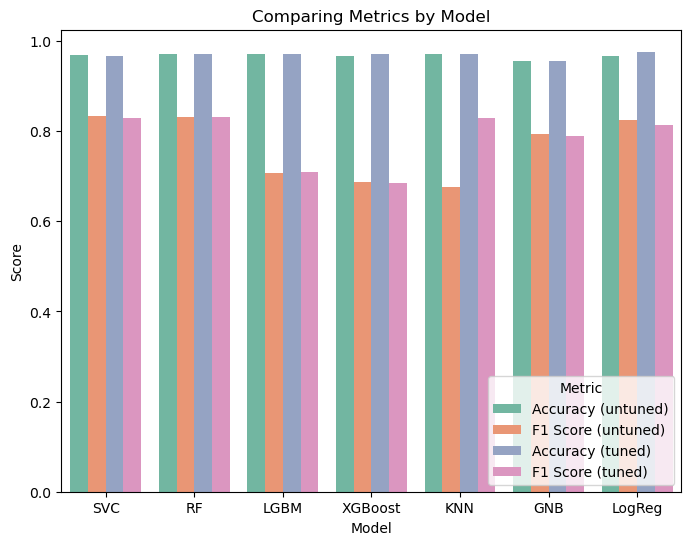

In [3]:
# Create the bar plot using Seaborn
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
sns.barplot(x='Model', y='Score', hue='Metric', data=df, palette=sns.color_palette("Set2"))

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparing Metrics by Model')

plt.legend(title="Metric", bbox_to_anchor=(1, 0), loc='lower right')

# Show the plot
plt.show()

## 4) Create subsets for each metric by tuned/untuned

In [4]:
accuracy_df = df[df['Metric'].str.contains("Accuracy")]
f1_score_df = df[df['Metric'].str.contains("F1 Score")]

tuned_df = df[df['Metric'].str.contains("\(tuned\)")] 
untuned_df = df[df['Metric'].str.contains("\(untuned\)")] 

## 5) Compare accuracy scores (with matplotlib)

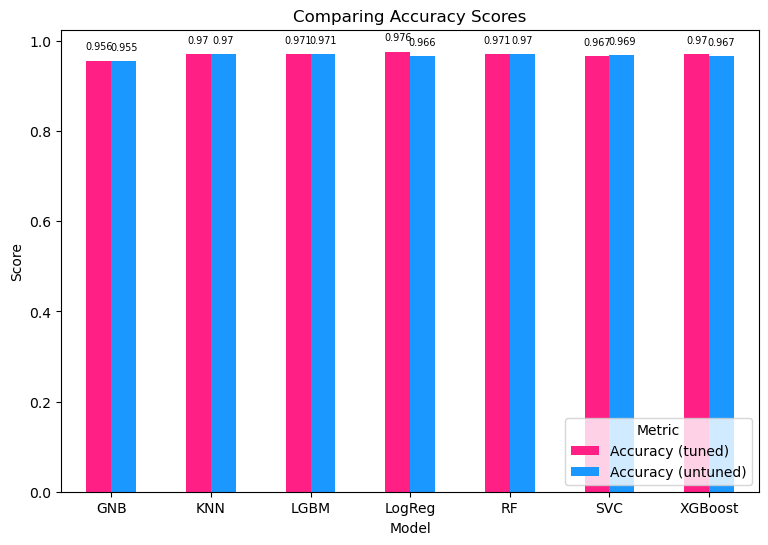

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Pivot the DataFrame to get separate columns for m1 and m2 scores
pivoted_df = accuracy_df.pivot(index="Model", columns="Metric", values="Score")

# Plot the bar chart
ax = pivoted_df.plot(kind="bar", figsize=(9, 6), color=["#ff1f85", "#1a98ff"])
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparing Accuracy Scores")
plt.legend(title="Metric")

# Add values above the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)
    
# Move the legend to the bottom-right corner
plt.legend(title="Metric", bbox_to_anchor=(1, 0), loc='lower right')
plt.xticks(rotation=0)
plt.show()

## 6) Compare accuracy scores (with seaborn)

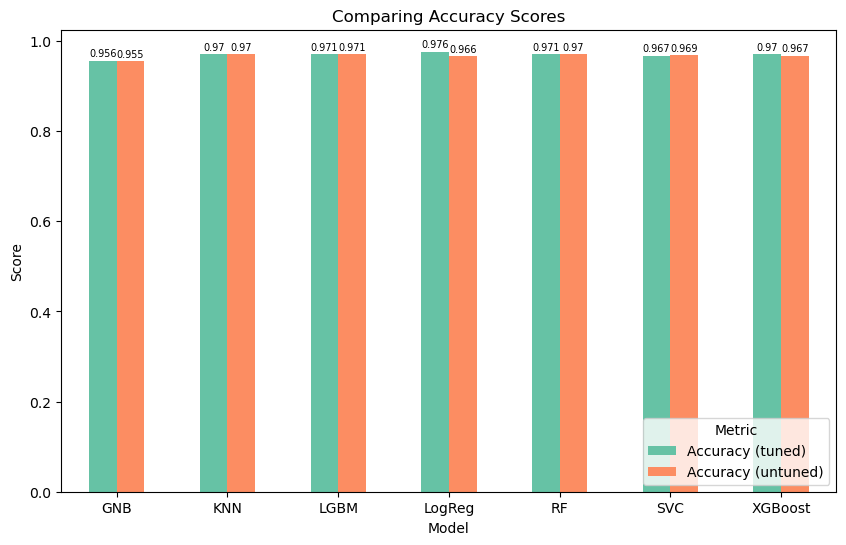

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn

# Pivot the DataFrame to get separate columns for m1 and m2 scores
pivoted_df = accuracy_df.pivot(index="Model", columns="Metric", values="Score")

# Use the "muted" color palette from seaborn
sns.set_palette("Set2")

# Plot the bar chart with the predefined color palette
ax = pivoted_df.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparing Accuracy Scores")

# Add values above the bars with smaller font size
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=7)

plt.legend(title="Metric", bbox_to_anchor=(1, 0), loc='lower right')
plt.xticks(rotation=0)
plt.show()

## 7) Compare F1 scores (with matplotlib)

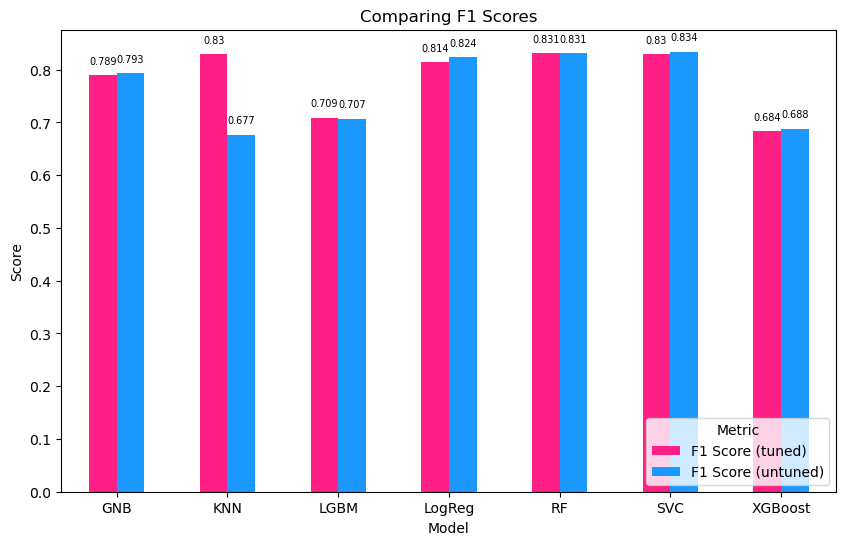

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Pivot the DataFrame to get separate columns for m1 and m2 scores
pivoted_df = f1_score_df.pivot(index="Model", columns="Metric", values="Score")

# Plot the bar chart
ax = pivoted_df.plot(kind="bar", figsize=(10, 6), color=["#ff1f85", "#1a98ff"])
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparing F1 Scores")
plt.legend(title="Metric")

# Add values above the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)
    
# Move the legend to the bottom-right corner
plt.legend(title="Metric", bbox_to_anchor=(1, 0), loc='lower right')
plt.xticks(rotation=0)
plt.show()

## 8) Pivot data for heatmap creation

In [8]:
# Using pivot to create a new DataFrame with metrics as columns and models as index
grouped_df = df.pivot(index='Metric', columns='Model', values='Score')

custom_order = ['SVC', 'RF', 'LGBM', 'XGBoost', 'KNN', 'GNB', 'LogReg']
#reordered_df = grouped_df.reindex(custom_order)

# Transpose the axes
#transposed_df = grouped_df.transpose()
#transposed_df

grouped_df = grouped_df[custom_order]
grouped_df

Model,SVC,RF,LGBM,XGBoost,KNN,GNB,LogReg
Metric,,,,,,,
Accuracy (tuned),0.967,0.971,0.971,0.970,0.970,0.956,0.976
Accuracy (untuned),0.969,0.970,0.971,0.967,0.970,0.955,0.966
F1 Score (tuned),0.830,0.831,0.709,0.684,0.830,0.789,0.814
F1 Score (untuned),0.834,0.831,0.707,0.688,0.677,0.793,0.824


## 9) Heatmap for each metric by tuned/untuned model

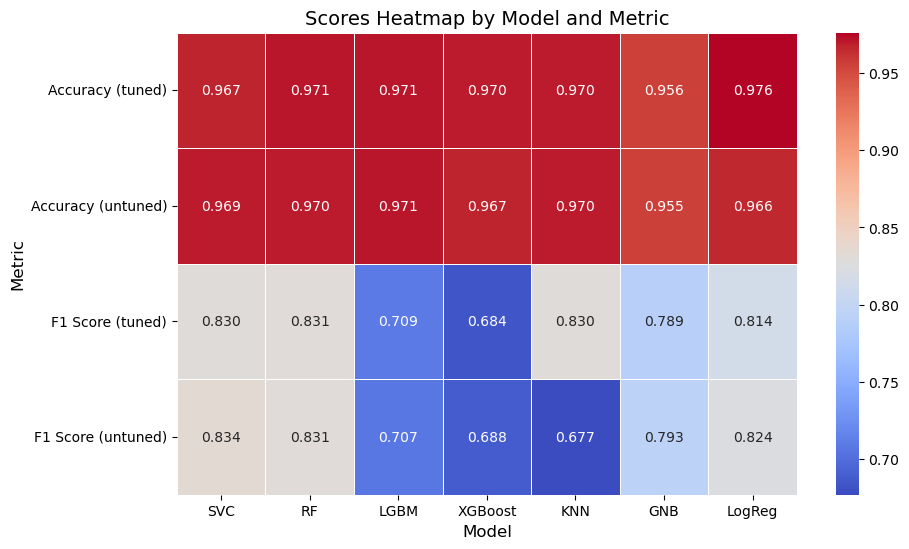

In [9]:
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_df, cmap='coolwarm', annot=True, fmt=".3f", linewidths=0.5)

plt.xlabel("Model", fontsize=12)
plt.ylabel("Metric", fontsize=12)
plt.title("Scores Heatmap by Model and Metric", fontsize=14)
plt.show()

## 10) Heatmap for accuracy only by tuned/untuned model

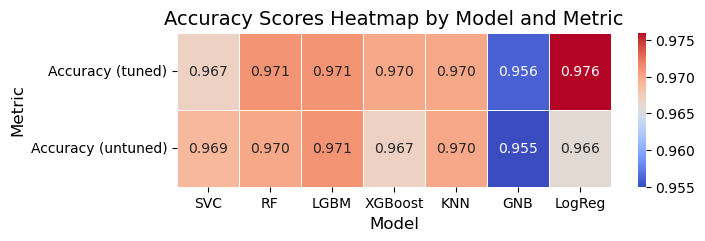

In [10]:
grouped_df = accuracy_df.pivot(index='Metric', columns='Model', values='Score')
custom_order = ['SVC', 'RF', 'LGBM', 'XGBoost', 'KNN', 'GNB', 'LogReg']
grouped_df = grouped_df[custom_order]

# Create a heatmap using Seaborn
plt.figure(figsize=(7, 2))
sns.heatmap(grouped_df, cmap='coolwarm', annot=True, fmt=".3f", linewidths=0.5)

plt.xlabel("Model", fontsize=12)
plt.ylabel("Metric", fontsize=12)
plt.title("Accuracy Scores Heatmap by Model and Metric", fontsize=14)
plt.show()

## 11) Heatmap for F1 scores only by tuned/untuned model

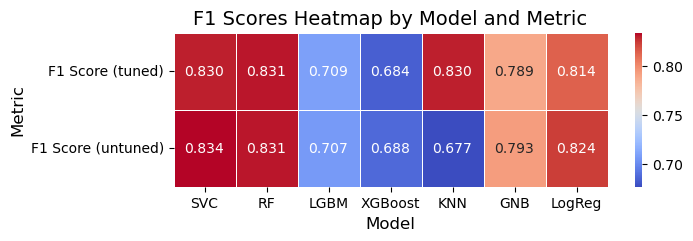

In [11]:
grouped_df = f1_score_df.pivot(index='Metric', columns='Model', values='Score')
custom_order = ['SVC', 'RF', 'LGBM', 'XGBoost', 'KNN', 'GNB', 'LogReg']
grouped_df = grouped_df[custom_order]

# Create a heatmap using Seaborn
plt.figure(figsize=(7, 2))
sns.heatmap(grouped_df, cmap='coolwarm', annot=True, fmt=".3f", linewidths=0.5)

plt.xlabel("Model", fontsize=12)
plt.ylabel("Metric", fontsize=12)
plt.title("F1 Scores Heatmap by Model and Metric", fontsize=14)
plt.show()